<a href="https://colab.research.google.com/github/suminkkk/DA_STUDY/blob/main/Kaggle/01.%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉

## 파일불러오기 및 데이터 확인

In [1]:
# 해당 옵션을 사용하지 않으면 한글 깨짐..
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df_train = pd.read_csv('/content/train (4).csv', index_col='PassengerId')
df_test = pd.read_csv('/content/test (3).csv', index_col='PassengerId')

In [4]:
print(df_train.shape,df_test.shape)

(891, 11) (418, 10)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


[컬럼]
- Survived : 생존은 1로 사망은 0으로 표시
- Pclass : 1등석은 1, 2등석은 2, 3등석은 3으로 표시
- Sibsp : siblings / spouses (형제, 배우자)
- Parch : parents / children (부모님, 자녀)
- ticket : 티켓 일련번호
- cabin : 선실 번호
- embarked : C : Cherbourg, Q : Queenstown, S : Southampton (선착장)

In [7]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
df_train.info()

## Age, Cabin, Embarked 결측치

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: >

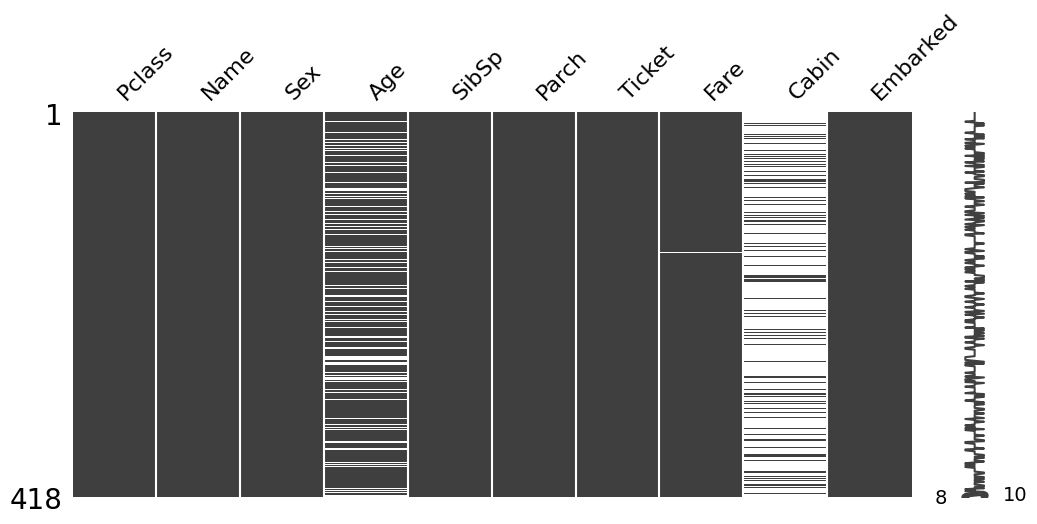

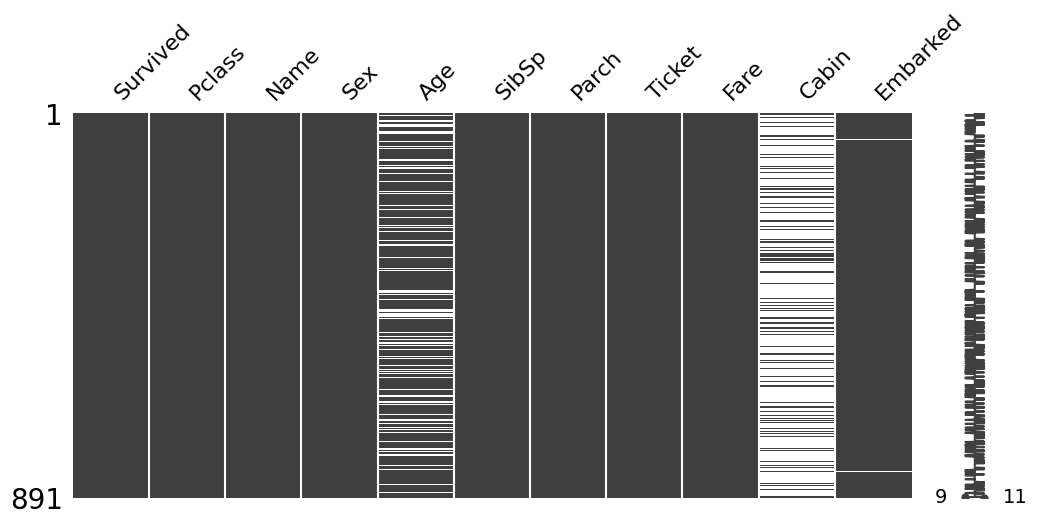

In [11]:
#na값 쉽게 보는 함수
import missingno as msno
msno.matrix(df_test, figsize=(12,5))
msno.matrix(df_train, figsize=(12,5))
## AGE, CABIN NA값 많음

## EDA

### 생존/사망

In [8]:
# 생존/사망 인원 확인

df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [77]:
# 생존/사망 컬럼 추가

df_train["Survived_label"] = df_train["Survived"].replace(0, "Dead").replace(1, "Survived")

<Axes: >

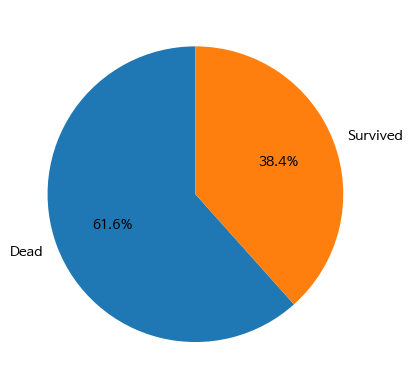

In [10]:
survival_rate_pie = df_train['Survived_label'].value_counts().plot.pie(autopct='%.1f%%',startangle=90, )
survival_rate_pie .set_ylabel('')

survival_rate_pie

## 생존률 38.4% / 사망률 61.6%

### 탑승자 분포

In [11]:
import seaborn as sns

In [36]:
# 객실 컬럼 추가
df_train['Pclass_label'] = df_train["Pclass"].replace(1, 'First Class').replace(2, 'Business').replace(3, 'Economy')

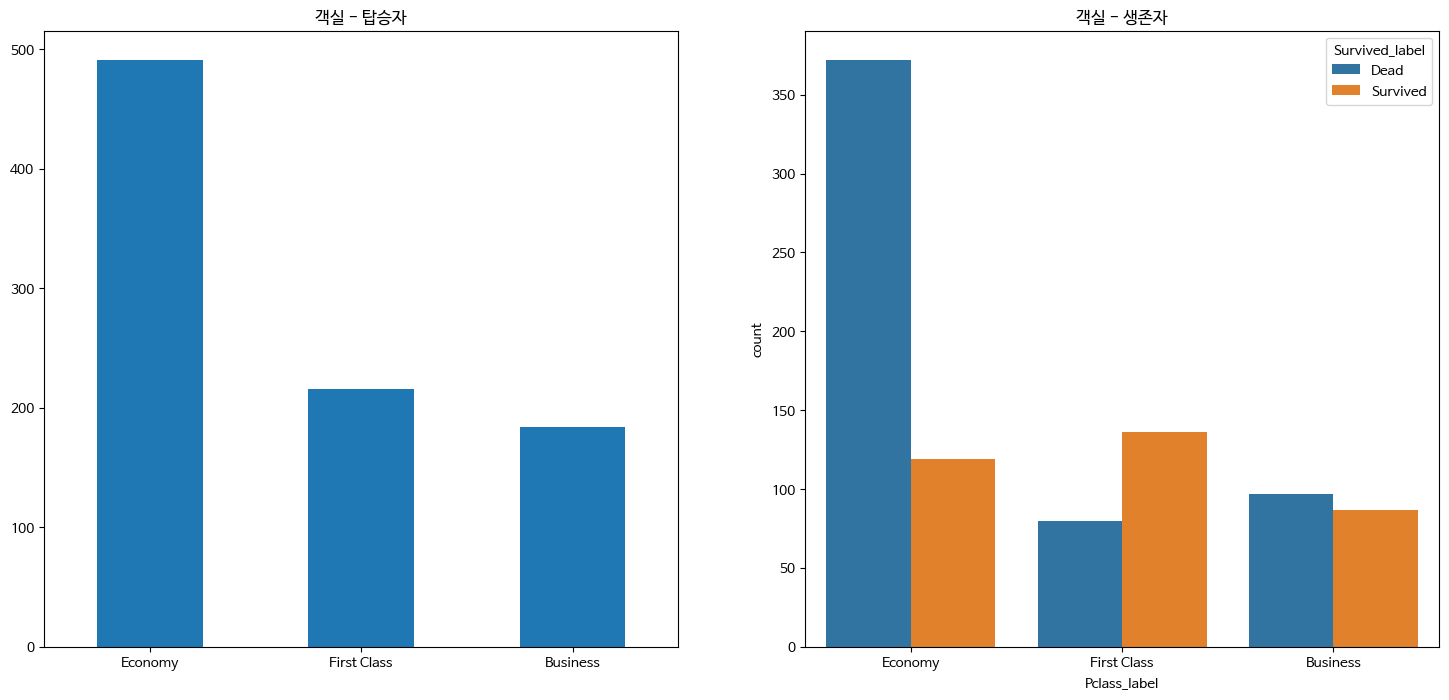

In [16]:
# 객실에 따른

# subplot
f, ax = plt.subplots(1,2, figsize=(18,8))

# Pclass - 1등석/2등석/3등석 분포
#bar1 = df_train[['Pclass_label','Survived_label']].groupby(['Pclass_label']).count().plot.bar(ax=ax[0])
bar1 = df_train['Pclass_label'].value_counts().plot(kind='bar', rot='horizontal',ax=ax[0])
bar1.set_title('객실 - 탑승자')
bar2 = sns.countplot(data=df_train, x="Pclass_label", hue="Survived_label")
bar2.set_title('객실 - 생존자')
plt.show()

# pclass 별 탑승률 : 3>1>2
# pclass  생존률 : 1>3>2
# pclass  사망률 : 3>2>1

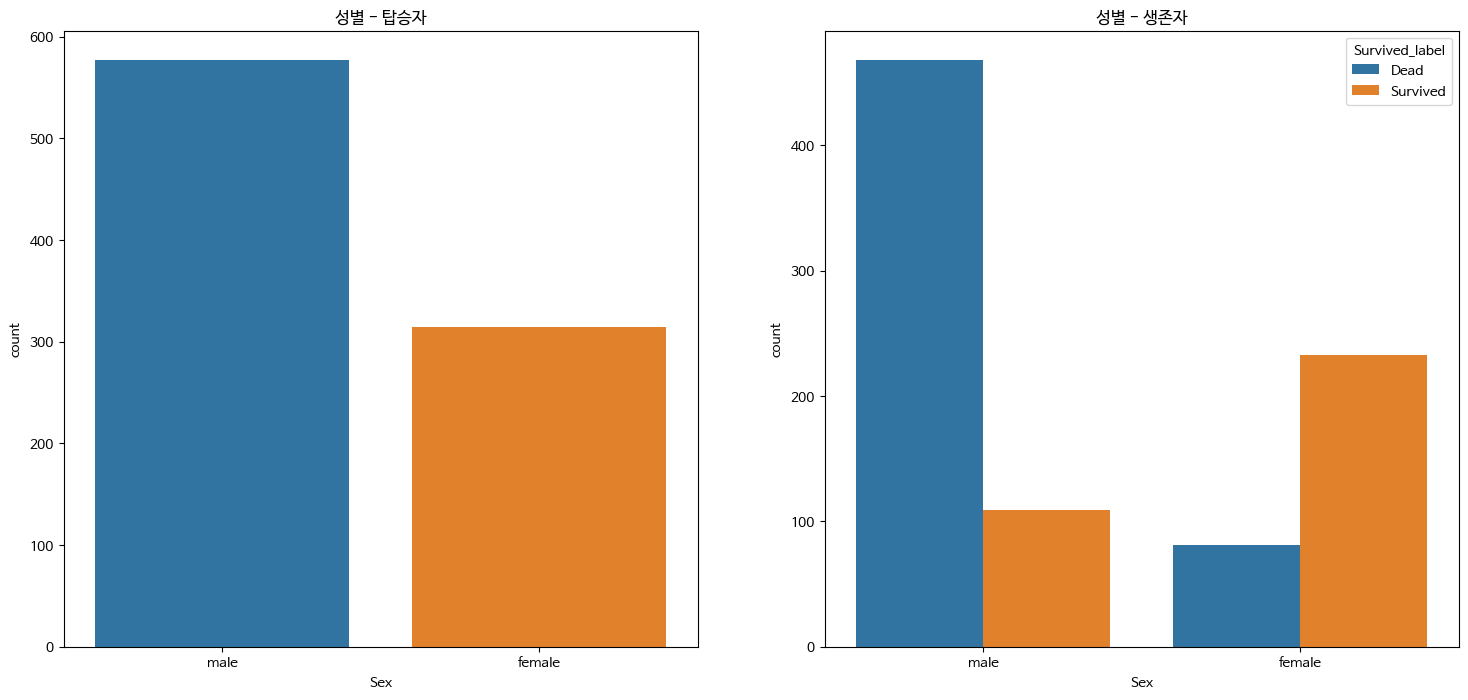

In [15]:
# 성별에 따른

f, ax = plt.subplots(1,2,figsize=(18,8))

# 성별 탑승자
bar1 = sns.countplot(x='Sex', data=df_train, ax=ax[0])
bar1.set_title('성별 - 탑승자')
# 성별 생존자
bar2 = sns.countplot(data = df_train, x = 'Sex', hue='Survived_label')
bar2.set_title('성별 - 생존자')
plt.show()
# 탑승자 : 남 > 여
# 생존률 : 여 > 남
# 사망률 : 남 > 여

### 출발지

In [37]:
# 출발지 컬럼 추가
df_train['Embarked_label'] = df_train['Embarked'].replace('S','Southampton').replace('C','Cherbourg').replace('Q','Queenstown')

Text(0.5, 1.0, '출발지 - 생존자')

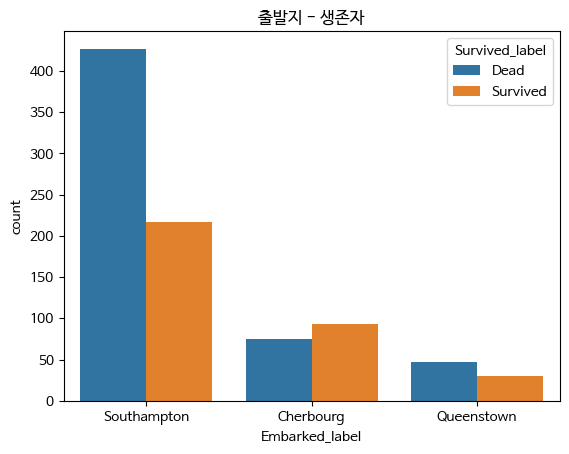

In [21]:
plt_em = sns.countplot(data=df_train, x="Embarked_label", hue="Survived_label")
plt_em.set_title('출발지 - 생존자')
# 생존률 : S > C > Q
# 사망률 : S > C > Q

### 이름

In [25]:
df_train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [43]:
# 호칭title 컬럼 추가
df_train['title'] = ""
for i, row in df_train.iterrows():
    df_train.loc[i, 'title'] = df_train.loc[i, 'Name'].split(',')[1].split('.')[0].lower()


df_train['title']

PassengerId
1         mr
2        mrs
3       miss
4        mrs
5         mr
       ...  
887      rev
888     miss
889     miss
890       mr
891       mr
Name: title, Length: 891, dtype: object

<Axes: xlabel='count', ylabel='title'>

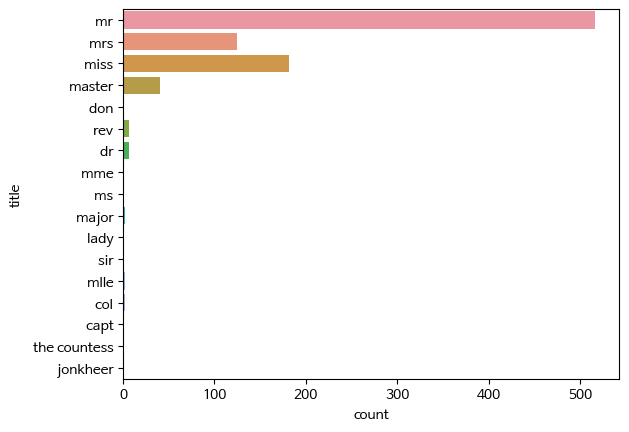

In [45]:
# 호칭에 따른 countplot
sns.countplot(y='title',data=df_train)

### 나이

In [46]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<ipython-input-50-0fc9fe439579>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train['Age']>0]['Age'])


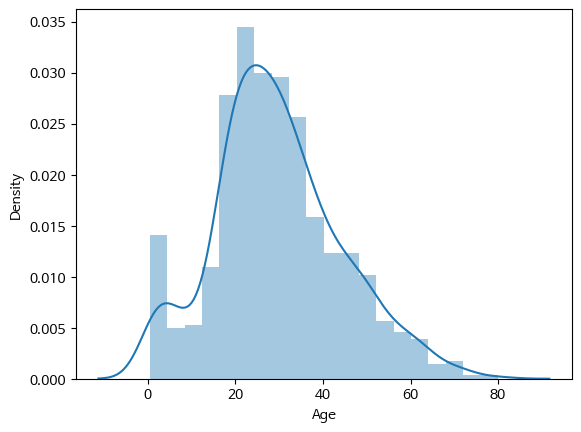

In [50]:
sns.distplot(df_train[df_train['Age']>0]['Age'])
plt.show()
# 20-40세가 많음

<Axes: >

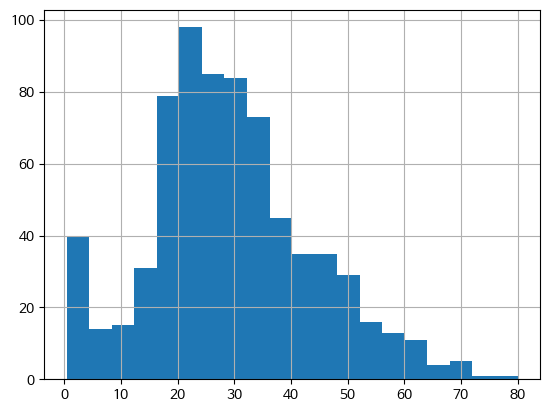

In [85]:
df_train['Age'].hist(bins=20)

<Axes: >

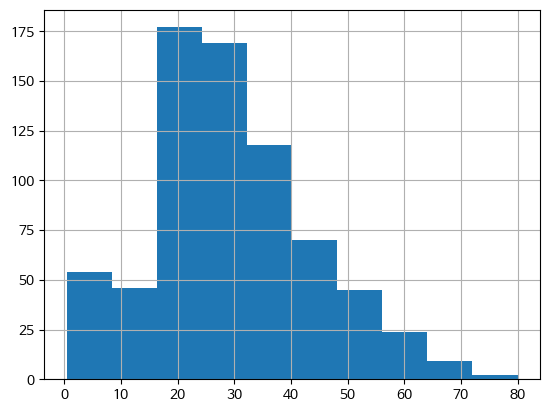

In [87]:
df_train['Age'].hist(bins=10)

<Axes: xlabel='Age', ylabel='count'>

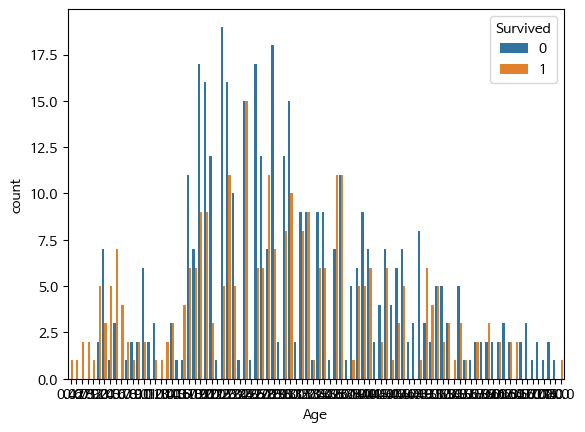

In [89]:
# 나이별 생존률

sns.countplot(x='Age', hue='Survived', data=df_train)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


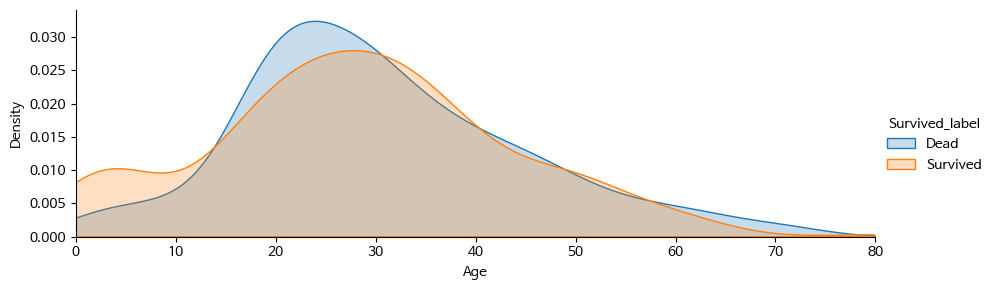

In [90]:
f = sns.FacetGrid(df_train, hue='Survived_label', aspect=3)
f.map(sns.kdeplot,'Age',shade=True)
f.set(xlim=(0,df_train['Age'].max()))
f.add_legend()

### 가족관계
* Sibsp : siblings / spouses (형제, 배우자)
* Parch : parents / children (부모님, 자녀)

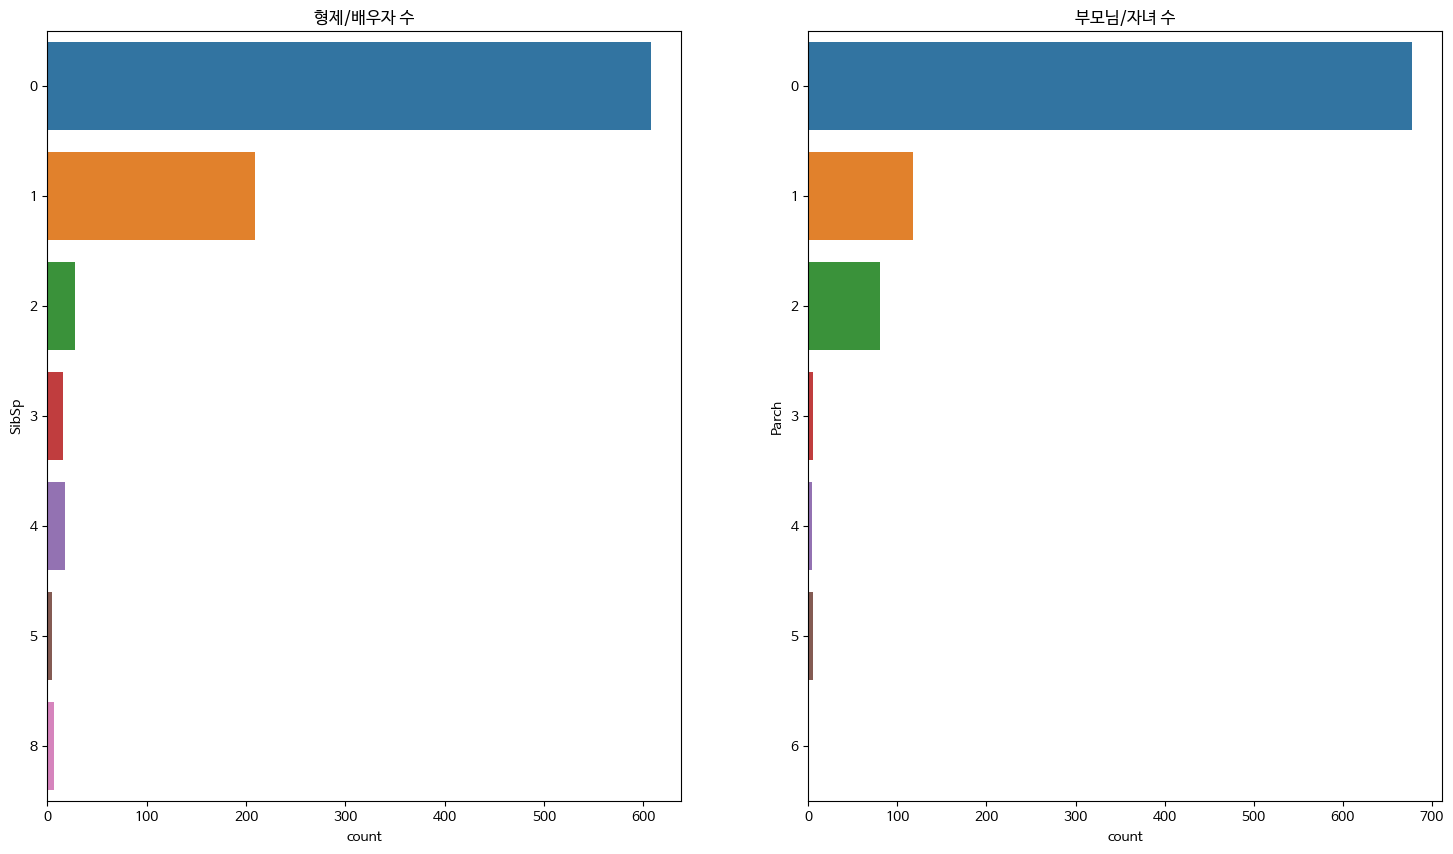

In [61]:
f,ax = plt.subplots(1,2,figsize=(18,10))

fam1 = sns.countplot(y='SibSp', data=df_train, ax=ax[0])
fam1.set_title('형제/배우자 수')
fam2 = sns.countplot(y='Parch', data=df_train)
fam2.set_title('부모님/자녀 수')
plt.show()
## 형제 없는 경우가 가장 많음.
## 부모/자녀 없는 경우 가장 많음

In [74]:
# 가족 컬럼 추가  (1인가구 / 가족단위)

df_train.loc[(df_train["SibSp"] == 0 ) & (df_train["Parch"] == 0),"Single"] = 'Single'
df_train.loc[(df_train["SibSp"] != 0 ) | (df_train["Parch"] != 0),"Single"] = 'Family'

df_train[["SibSp","Parch","Single"]].head(5)

,SibSp,Parch,Single
PassengerId,,,
1,1,0,Family
2,1,0,Family
3,0,0,Single
4,1,0,Family
5,0,0,Single


<Axes: xlabel='Single', ylabel='count'>

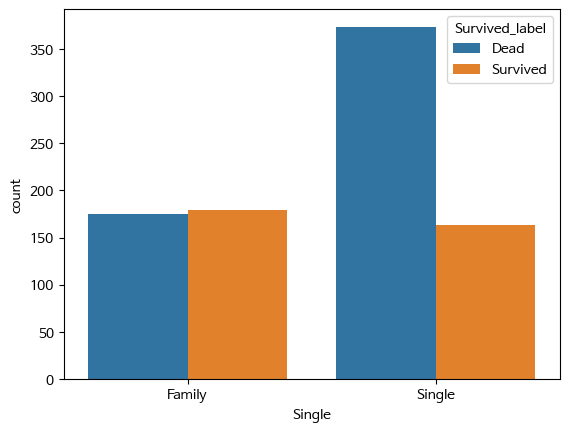

In [78]:
sns.countplot(data=df_train, x="Single", hue="Survived_label")

In [79]:
# 가족수 컬럼 추가

df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_train[["SibSp", "Parch", "FamilySize"]].head(10)

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1
6,0,0,1
7,0,0,1
8,3,1,5
9,0,2,3


<Axes: xlabel='FamilySize', ylabel='count'>

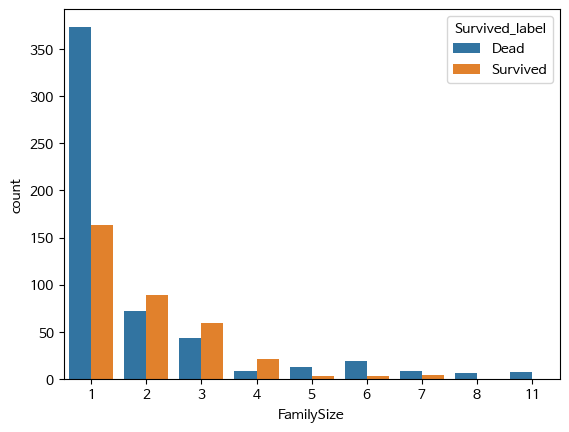

In [81]:
sns.countplot(data=df_train, x="FamilySize", hue="Survived_label")

### 티켓 일련번호

In [63]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [66]:
df_train['Ticket_type']=""
for i, row in df_train.iterrows():
    if df_train['Ticket'][i] in (df_train['Ticket'].value_counts()[df_train['Ticket'].value_counts()==1]).index:
        df_train['Ticket_type'][i]="Single"
    elif df_train['Ticket'][i] in (df_train['Ticket'].value_counts()[df_train['Ticket'].value_counts()==2]).index:
        df_train['Ticket_type'][i]="Double"
    else:
        df_train['Ticket_type'][i]="Multiple"
df_train['Ticket_type']

<ipython-input-66-432a0381363a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Ticket_type'][i]="Single"
<ipython-input-66-432a0381363a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Ticket_type'][i]="Single"
<ipython-input-66-432a0381363a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Ticket_type'][i]="Single"
<ipython-input-66-432a0381363a>:6: SettingWithCopyWarning: 
A value is trying to be set 

PassengerId
1      Single
2      Single
3      Single
4      Double
5      Single
        ...  
887    Single
888    Single
889    Double
890    Single
891    Single
Name: Ticket_type, Length: 891, dtype: object

<Axes: xlabel='count', ylabel='Ticket_type'>

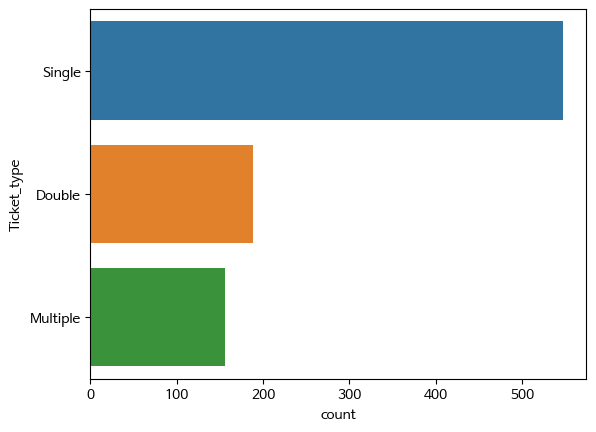

In [68]:
sns.countplot(y='Ticket_type',data=df_train)
plt.show()

### 티켓 가격

In [70]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Pclass', ylabel='Fare'>

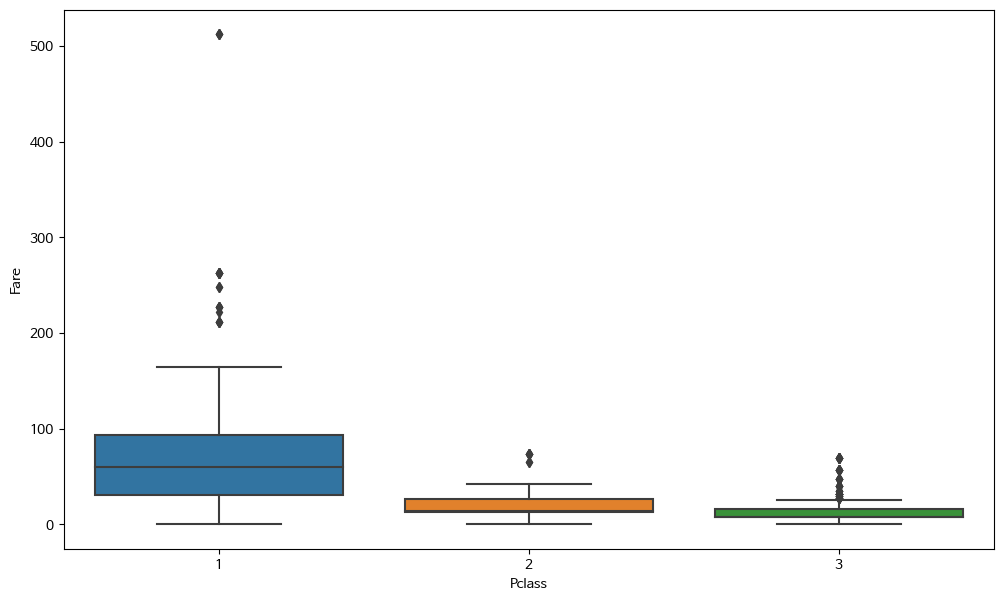

In [71]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Fare',data=df_train)
#class1이 가장 비싼티켓

<ipython-input-73-46883af9cd51>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train['Fare']>0]['Fare'])


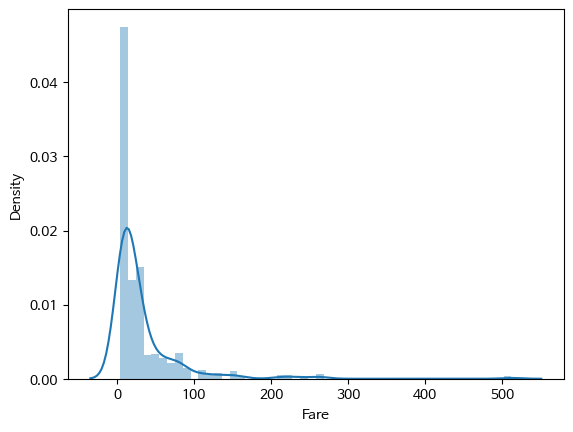

In [73]:
sns.distplot(df_train[df_train['Fare']>0]['Fare'])
plt.show()